In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

In [2]:
data = pd.read_csv("interpolation2.csv")

In [3]:

data.head()

,BJFS,BJYQ,BJSH,BJGB,TJBD,TJBH,TJWQ,HEYY,HELQ,HELY,HECC,HEZJ,HECD,HETS,SXLQ,HECX
0,0.01502,-0.01460,-0.01518,-0.02107,-0.01494,-0.05670,-0.09392,-0.02463,-0.02155,-0.03086,-0.01620,-0.00602,-0.01941,-0.01301,-0.02615,-0.07829
1,0.00656,-0.01830,-0.01504,-0.02191,-0.02039,-0.06065,-0.09613,-0.03097,-0.02718,-0.03442,-0.02593,-0.01652,-0.02710,-0.01721,-0.02980,-0.08521
2,0.01247,-0.01197,-0.01129,-0.01348,-0.01345,-0.05397,-0.09328,-0.02190,-0.01968,-0.02785,-0.01644,-0.00888,-0.02035,-0.00989,-0.02188,-0.07737
3,0.01429,-0.00682,-0.01008,-0.01132,-0.01077,-0.05162,-0.09118,-0.02017,-0.01842,-0.02431,-0.01313,-0.00642,-0.01778,-0.00830,-0.01914,-0.07448
4,0.01597,-0.00698,-0.00759,-0.00943,-0.00980,-0.05181,-0.08622,-0.01949,-0.01651,-0.02336,-0.01223,-0.00565,-0.01818,-0.00585,-0.01741,-0.07407


In [4]:
df=data
df.head()

,BJFS,BJYQ,BJSH,BJGB,TJBD,TJBH,TJWQ,HEYY,HELQ,HELY,HECC,HEZJ,HECD,HETS,SXLQ,HECX
0,0.01502,-0.01460,-0.01518,-0.02107,-0.01494,-0.05670,-0.09392,-0.02463,-0.02155,-0.03086,-0.01620,-0.00602,-0.01941,-0.01301,-0.02615,-0.07829
1,0.00656,-0.01830,-0.01504,-0.02191,-0.02039,-0.06065,-0.09613,-0.03097,-0.02718,-0.03442,-0.02593,-0.01652,-0.02710,-0.01721,-0.02980,-0.08521
2,0.01247,-0.01197,-0.01129,-0.01348,-0.01345,-0.05397,-0.09328,-0.02190,-0.01968,-0.02785,-0.01644,-0.00888,-0.02035,-0.00989,-0.02188,-0.07737
3,0.01429,-0.00682,-0.01008,-0.01132,-0.01077,-0.05162,-0.09118,-0.02017,-0.01842,-0.02431,-0.01313,-0.00642,-0.01778,-0.00830,-0.01914,-0.07448
4,0.01597,-0.00698,-0.00759,-0.00943,-0.00980,-0.05181,-0.08622,-0.01949,-0.01651,-0.02336,-0.01223,-0.00565,-0.01818,-0.00585,-0.01741,-0.07407


In [5]:
df = df[['HEZJ']]

dataset = df.values
dataset = dataset.astype('float32')

dataset

array([[-0.00602],
       [-0.01652],
       [-0.00888],
       ...,
       [ 0.0012 ],
       [-0.00295],
       [-0.00218]], dtype=float32)

In [6]:
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)

In [7]:

dataset

array([[0.33714902],
       [0.11036718],
       [0.275378  ],
       ...,
       [0.49308854],
       [0.40345573],
       [0.42008638]], dtype=float32)

In [8]:
train_size = int(len(dataset) * 0.66667)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size, :], dataset[train_size:len(dataset), :]
print(len(train), len(test))

730 365


In [9]:
# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
  dataX, dataY = [], []
  for i in range(len(dataset)-look_back-1):
    a = dataset[i:(i+look_back), 0]
    dataX.append(a)
    dataY.append(dataset[i + look_back, 0])
  return np.array(dataX), np.array(dataY)

In [10]:

look_back = 10
trainX, trainY = create_dataset(train, look_back=look_back)
testX, testY = create_dataset(test, look_back=look_back)

In [11]:

trainX

print(len(trainX))

719


In [12]:

trainY

print(len(trainY))

719


In [13]:
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

In [14]:
model = Sequential()
model.add(LSTM(10, input_shape=(1, look_back)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=2000, batch_size=32, verbose=2)

Epoch 1/2000
23/23 - 0s - loss: 0.1391
Epoch 2/2000
23/23 - 0s - loss: 0.0721
Epoch 3/2000
23/23 - 0s - loss: 0.0332
Epoch 4/2000
23/23 - 0s - loss: 0.0186
Epoch 5/2000
23/23 - 0s - loss: 0.0165
Epoch 6/2000
23/23 - 0s - loss: 0.0164
Epoch 7/2000
23/23 - 0s - loss: 0.0163
Epoch 8/2000
23/23 - 0s - loss: 0.0163
Epoch 9/2000
23/23 - 0s - loss: 0.0162
Epoch 10/2000
23/23 - 0s - loss: 0.0162
Epoch 11/2000
23/23 - 0s - loss: 0.0161
Epoch 12/2000
23/23 - 0s - loss: 0.0161
Epoch 13/2000
23/23 - 0s - loss: 0.0160
Epoch 14/2000
23/23 - 0s - loss: 0.0160
Epoch 15/2000
23/23 - 0s - loss: 0.0159
Epoch 16/2000
23/23 - 0s - loss: 0.0159
Epoch 17/2000
23/23 - 0s - loss: 0.0158
Epoch 18/2000
23/23 - 0s - loss: 0.0158
Epoch 19/2000
23/23 - 0s - loss: 0.0157
Epoch 20/2000
23/23 - 0s - loss: 0.0156
Epoch 21/2000
23/23 - 0s - loss: 0.0156
Epoch 22/2000
23/23 - 0s - loss: 0.0155
Epoch 23/2000
23/23 - 0s - loss: 0.0155
Epoch 24/2000
23/23 - 0s - loss: 0.0155
Epoch 25/2000
23/23 - 0s - loss: 0.0154
Epoch 26/

Epoch 204/2000
23/23 - 0s - loss: 0.0143
Epoch 205/2000
23/23 - 0s - loss: 0.0143
Epoch 206/2000
23/23 - 0s - loss: 0.0144
Epoch 207/2000
23/23 - 0s - loss: 0.0144
Epoch 208/2000
23/23 - 0s - loss: 0.0143
Epoch 209/2000
23/23 - 0s - loss: 0.0143
Epoch 210/2000
23/23 - 0s - loss: 0.0144
Epoch 211/2000
23/23 - 0s - loss: 0.0143
Epoch 212/2000
23/23 - 0s - loss: 0.0144
Epoch 213/2000
23/23 - 0s - loss: 0.0143
Epoch 214/2000
23/23 - 0s - loss: 0.0144
Epoch 215/2000
23/23 - 0s - loss: 0.0144
Epoch 216/2000
23/23 - 0s - loss: 0.0143
Epoch 217/2000
23/23 - 0s - loss: 0.0143
Epoch 218/2000
23/23 - 0s - loss: 0.0145
Epoch 219/2000
23/23 - 0s - loss: 0.0143
Epoch 220/2000
23/23 - 0s - loss: 0.0144
Epoch 221/2000
23/23 - 0s - loss: 0.0144
Epoch 222/2000
23/23 - 0s - loss: 0.0144
Epoch 223/2000
23/23 - 0s - loss: 0.0144
Epoch 224/2000
23/23 - 0s - loss: 0.0144
Epoch 225/2000
23/23 - 0s - loss: 0.0144
Epoch 226/2000
23/23 - 0s - loss: 0.0143
Epoch 227/2000
23/23 - 0s - loss: 0.0143
Epoch 228/2000
2

Epoch 404/2000
23/23 - 0s - loss: 0.0140
Epoch 405/2000
23/23 - 0s - loss: 0.0142
Epoch 406/2000
23/23 - 0s - loss: 0.0140
Epoch 407/2000
23/23 - 0s - loss: 0.0141
Epoch 408/2000
23/23 - 0s - loss: 0.0140
Epoch 409/2000
23/23 - 0s - loss: 0.0141
Epoch 410/2000
23/23 - 0s - loss: 0.0141
Epoch 411/2000
23/23 - 0s - loss: 0.0140
Epoch 412/2000
23/23 - 0s - loss: 0.0141
Epoch 413/2000
23/23 - 0s - loss: 0.0141
Epoch 414/2000
23/23 - 0s - loss: 0.0140
Epoch 415/2000
23/23 - 0s - loss: 0.0140
Epoch 416/2000
23/23 - 0s - loss: 0.0140
Epoch 417/2000
23/23 - 0s - loss: 0.0140
Epoch 418/2000
23/23 - 0s - loss: 0.0140
Epoch 419/2000
23/23 - 0s - loss: 0.0140
Epoch 420/2000
23/23 - 0s - loss: 0.0141
Epoch 421/2000
23/23 - 0s - loss: 0.0140
Epoch 422/2000
23/23 - 0s - loss: 0.0140
Epoch 423/2000
23/23 - 0s - loss: 0.0139
Epoch 424/2000
23/23 - 0s - loss: 0.0140
Epoch 425/2000
23/23 - 0s - loss: 0.0140
Epoch 426/2000
23/23 - 0s - loss: 0.0140
Epoch 427/2000
23/23 - 0s - loss: 0.0139
Epoch 428/2000
2

Epoch 604/2000
23/23 - 0s - loss: 0.0133
Epoch 605/2000
23/23 - 0s - loss: 0.0134
Epoch 606/2000
23/23 - 0s - loss: 0.0133
Epoch 607/2000
23/23 - 0s - loss: 0.0133
Epoch 608/2000
23/23 - 0s - loss: 0.0133
Epoch 609/2000
23/23 - 0s - loss: 0.0135
Epoch 610/2000
23/23 - 0s - loss: 0.0133
Epoch 611/2000
23/23 - 0s - loss: 0.0134
Epoch 612/2000
23/23 - 0s - loss: 0.0133
Epoch 613/2000
23/23 - 0s - loss: 0.0134
Epoch 614/2000
23/23 - 0s - loss: 0.0133
Epoch 615/2000
23/23 - 0s - loss: 0.0133
Epoch 616/2000
23/23 - 0s - loss: 0.0134
Epoch 617/2000
23/23 - 0s - loss: 0.0132
Epoch 618/2000
23/23 - 0s - loss: 0.0133
Epoch 619/2000
23/23 - 0s - loss: 0.0133
Epoch 620/2000
23/23 - 0s - loss: 0.0133
Epoch 621/2000
23/23 - 0s - loss: 0.0132
Epoch 622/2000
23/23 - 0s - loss: 0.0132
Epoch 623/2000
23/23 - 0s - loss: 0.0133
Epoch 624/2000
23/23 - 0s - loss: 0.0132
Epoch 625/2000
23/23 - 0s - loss: 0.0133
Epoch 626/2000
23/23 - 0s - loss: 0.0133
Epoch 627/2000
23/23 - 0s - loss: 0.0133
Epoch 628/2000
2

Epoch 804/2000
23/23 - 0s - loss: 0.0130
Epoch 805/2000
23/23 - 0s - loss: 0.0129
Epoch 806/2000
23/23 - 0s - loss: 0.0129
Epoch 807/2000
23/23 - 0s - loss: 0.0131
Epoch 808/2000
23/23 - 0s - loss: 0.0130
Epoch 809/2000
23/23 - 0s - loss: 0.0129
Epoch 810/2000
23/23 - 0s - loss: 0.0129
Epoch 811/2000
23/23 - 0s - loss: 0.0129
Epoch 812/2000
23/23 - 0s - loss: 0.0130
Epoch 813/2000
23/23 - 0s - loss: 0.0129
Epoch 814/2000
23/23 - 0s - loss: 0.0129
Epoch 815/2000
23/23 - 0s - loss: 0.0129
Epoch 816/2000
23/23 - 0s - loss: 0.0130
Epoch 817/2000
23/23 - 0s - loss: 0.0129
Epoch 818/2000
23/23 - 0s - loss: 0.0130
Epoch 819/2000
23/23 - 0s - loss: 0.0129
Epoch 820/2000
23/23 - 0s - loss: 0.0129
Epoch 821/2000
23/23 - 0s - loss: 0.0129
Epoch 822/2000
23/23 - 0s - loss: 0.0129
Epoch 823/2000
23/23 - 0s - loss: 0.0130
Epoch 824/2000
23/23 - 0s - loss: 0.0130
Epoch 825/2000
23/23 - 0s - loss: 0.0129
Epoch 826/2000
23/23 - 0s - loss: 0.0129
Epoch 827/2000
23/23 - 0s - loss: 0.0128
Epoch 828/2000
2

Epoch 1004/2000
23/23 - 0s - loss: 0.0129
Epoch 1005/2000
23/23 - 0s - loss: 0.0131
Epoch 1006/2000
23/23 - 0s - loss: 0.0127
Epoch 1007/2000
23/23 - 0s - loss: 0.0127
Epoch 1008/2000
23/23 - 0s - loss: 0.0128
Epoch 1009/2000
23/23 - 0s - loss: 0.0128
Epoch 1010/2000
23/23 - 0s - loss: 0.0127
Epoch 1011/2000
23/23 - 0s - loss: 0.0127
Epoch 1012/2000
23/23 - 0s - loss: 0.0127
Epoch 1013/2000
23/23 - 0s - loss: 0.0127
Epoch 1014/2000
23/23 - 0s - loss: 0.0126
Epoch 1015/2000
23/23 - 0s - loss: 0.0127
Epoch 1016/2000
23/23 - 0s - loss: 0.0128
Epoch 1017/2000
23/23 - 0s - loss: 0.0128
Epoch 1018/2000
23/23 - 0s - loss: 0.0127
Epoch 1019/2000
23/23 - 0s - loss: 0.0127
Epoch 1020/2000
23/23 - 0s - loss: 0.0126
Epoch 1021/2000
23/23 - 0s - loss: 0.0127
Epoch 1022/2000
23/23 - 0s - loss: 0.0127
Epoch 1023/2000
23/23 - 0s - loss: 0.0127
Epoch 1024/2000
23/23 - 0s - loss: 0.0126
Epoch 1025/2000
23/23 - 0s - loss: 0.0127
Epoch 1026/2000
23/23 - 0s - loss: 0.0127
Epoch 1027/2000
23/23 - 0s - loss:

23/23 - 0s - loss: 0.0126
Epoch 1200/2000
23/23 - 0s - loss: 0.0126
Epoch 1201/2000
23/23 - 0s - loss: 0.0126
Epoch 1202/2000
23/23 - 0s - loss: 0.0126
Epoch 1203/2000
23/23 - 0s - loss: 0.0126
Epoch 1204/2000
23/23 - 0s - loss: 0.0126
Epoch 1205/2000
23/23 - 0s - loss: 0.0125
Epoch 1206/2000
23/23 - 0s - loss: 0.0124
Epoch 1207/2000
23/23 - 0s - loss: 0.0127
Epoch 1208/2000
23/23 - 0s - loss: 0.0126
Epoch 1209/2000
23/23 - 0s - loss: 0.0125
Epoch 1210/2000
23/23 - 0s - loss: 0.0126
Epoch 1211/2000
23/23 - 0s - loss: 0.0124
Epoch 1212/2000
23/23 - 0s - loss: 0.0129
Epoch 1213/2000
23/23 - 0s - loss: 0.0125
Epoch 1214/2000
23/23 - 0s - loss: 0.0126
Epoch 1215/2000
23/23 - 0s - loss: 0.0126
Epoch 1216/2000
23/23 - 0s - loss: 0.0126
Epoch 1217/2000
23/23 - 0s - loss: 0.0129
Epoch 1218/2000
23/23 - 0s - loss: 0.0126
Epoch 1219/2000
23/23 - 0s - loss: 0.0127
Epoch 1220/2000
23/23 - 0s - loss: 0.0125
Epoch 1221/2000
23/23 - 0s - loss: 0.0126
Epoch 1222/2000
23/23 - 0s - loss: 0.0129
Epoch 12

Epoch 1395/2000
23/23 - 0s - loss: 0.0124
Epoch 1396/2000
23/23 - 0s - loss: 0.0125
Epoch 1397/2000
23/23 - 0s - loss: 0.0124
Epoch 1398/2000
23/23 - 0s - loss: 0.0124
Epoch 1399/2000
23/23 - 0s - loss: 0.0124
Epoch 1400/2000
23/23 - 0s - loss: 0.0124
Epoch 1401/2000
23/23 - 0s - loss: 0.0124
Epoch 1402/2000
23/23 - 0s - loss: 0.0124
Epoch 1403/2000
23/23 - 0s - loss: 0.0125
Epoch 1404/2000
23/23 - 0s - loss: 0.0124
Epoch 1405/2000
23/23 - 0s - loss: 0.0124
Epoch 1406/2000
23/23 - 0s - loss: 0.0124
Epoch 1407/2000
23/23 - 0s - loss: 0.0125
Epoch 1408/2000
23/23 - 0s - loss: 0.0125
Epoch 1409/2000
23/23 - 0s - loss: 0.0125
Epoch 1410/2000
23/23 - 0s - loss: 0.0127
Epoch 1411/2000
23/23 - 0s - loss: 0.0124
Epoch 1412/2000
23/23 - 0s - loss: 0.0125
Epoch 1413/2000
23/23 - 0s - loss: 0.0123
Epoch 1414/2000
23/23 - 0s - loss: 0.0124
Epoch 1415/2000
23/23 - 0s - loss: 0.0124
Epoch 1416/2000
23/23 - 0s - loss: 0.0125
Epoch 1417/2000
23/23 - 0s - loss: 0.0123
Epoch 1418/2000
23/23 - 0s - loss:

23/23 - 0s - loss: 0.0123
Epoch 1591/2000
23/23 - 0s - loss: 0.0122
Epoch 1592/2000
23/23 - 0s - loss: 0.0123
Epoch 1593/2000
23/23 - 0s - loss: 0.0122
Epoch 1594/2000
23/23 - 0s - loss: 0.0123
Epoch 1595/2000
23/23 - 0s - loss: 0.0122
Epoch 1596/2000
23/23 - 0s - loss: 0.0123
Epoch 1597/2000
23/23 - 0s - loss: 0.0123
Epoch 1598/2000
23/23 - 0s - loss: 0.0122
Epoch 1599/2000
23/23 - 0s - loss: 0.0124
Epoch 1600/2000
23/23 - 0s - loss: 0.0124
Epoch 1601/2000
23/23 - 0s - loss: 0.0124
Epoch 1602/2000
23/23 - 0s - loss: 0.0123
Epoch 1603/2000
23/23 - 0s - loss: 0.0124
Epoch 1604/2000
23/23 - 0s - loss: 0.0122
Epoch 1605/2000
23/23 - 0s - loss: 0.0124
Epoch 1606/2000
23/23 - 0s - loss: 0.0122
Epoch 1607/2000
23/23 - 0s - loss: 0.0123
Epoch 1608/2000
23/23 - 0s - loss: 0.0122
Epoch 1609/2000
23/23 - 0s - loss: 0.0124
Epoch 1610/2000
23/23 - 0s - loss: 0.0123
Epoch 1611/2000
23/23 - 0s - loss: 0.0124
Epoch 1612/2000
23/23 - 0s - loss: 0.0124
Epoch 1613/2000
23/23 - 0s - loss: 0.0123
Epoch 16

Epoch 1786/2000
23/23 - 0s - loss: 0.0123
Epoch 1787/2000
23/23 - 0s - loss: 0.0121
Epoch 1788/2000
23/23 - 0s - loss: 0.0121
Epoch 1789/2000
23/23 - 0s - loss: 0.0121
Epoch 1790/2000
23/23 - 0s - loss: 0.0121
Epoch 1791/2000
23/23 - 0s - loss: 0.0122
Epoch 1792/2000
23/23 - 0s - loss: 0.0121
Epoch 1793/2000
23/23 - 0s - loss: 0.0121
Epoch 1794/2000
23/23 - 0s - loss: 0.0122
Epoch 1795/2000
23/23 - 0s - loss: 0.0121
Epoch 1796/2000
23/23 - 0s - loss: 0.0121
Epoch 1797/2000
23/23 - 0s - loss: 0.0123
Epoch 1798/2000
23/23 - 0s - loss: 0.0123
Epoch 1799/2000
23/23 - 0s - loss: 0.0122
Epoch 1800/2000
23/23 - 0s - loss: 0.0121
Epoch 1801/2000
23/23 - 0s - loss: 0.0121
Epoch 1802/2000
23/23 - 0s - loss: 0.0121
Epoch 1803/2000
23/23 - 0s - loss: 0.0123
Epoch 1804/2000
23/23 - 0s - loss: 0.0122
Epoch 1805/2000
23/23 - 0s - loss: 0.0122
Epoch 1806/2000
23/23 - 0s - loss: 0.0122
Epoch 1807/2000
23/23 - 0s - loss: 0.0121
Epoch 1808/2000
23/23 - 0s - loss: 0.0121
Epoch 1809/2000
23/23 - 0s - loss:

Epoch 1982/2000
23/23 - 0s - loss: 0.0121
Epoch 1983/2000
23/23 - 0s - loss: 0.0120
Epoch 1984/2000
23/23 - 0s - loss: 0.0122
Epoch 1985/2000
23/23 - 0s - loss: 0.0121
Epoch 1986/2000
23/23 - 0s - loss: 0.0121
Epoch 1987/2000
23/23 - 0s - loss: 0.0120
Epoch 1988/2000
23/23 - 0s - loss: 0.0120
Epoch 1989/2000
23/23 - 0s - loss: 0.0120
Epoch 1990/2000
23/23 - 0s - loss: 0.0120
Epoch 1991/2000
23/23 - 0s - loss: 0.0121
Epoch 1992/2000
23/23 - 0s - loss: 0.0121
Epoch 1993/2000
23/23 - 0s - loss: 0.0119
Epoch 1994/2000
23/23 - 0s - loss: 0.0121
Epoch 1995/2000
23/23 - 0s - loss: 0.0121
Epoch 1996/2000
23/23 - 0s - loss: 0.0121
Epoch 1997/2000
23/23 - 0s - loss: 0.0121
Epoch 1998/2000
23/23 - 0s - loss: 0.0119
Epoch 1999/2000
23/23 - 0s - loss: 0.0120
Epoch 2000/2000
23/23 - 0s - loss: 0.0120


In [15]:
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

In [16]:
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])

In [17]:
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:, 0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:, 0]))
print('Test Score: %.2f RMSE' % (testScore))

Train Score: 0.01 RMSE
Test Score: 0.01 RMSE


In [18]:
trainPredictPlot = np.empty_like(dataset)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(trainPredict) + look_back, :] = trainPredict

In [19]:
testPredictPlot = np.empty_like(dataset)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict) + (look_back * 2) + 1:len(dataset) - 1, :] = testPredict

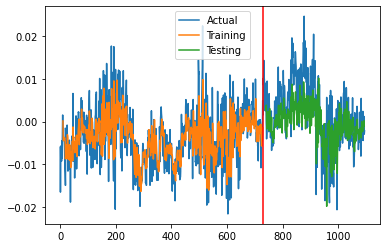

In [20]:

plt.plot(df['HEZJ'], label='Actual')
plt.plot(pd.DataFrame(trainPredictPlot, columns=["close"], index=df.index).close, label='Training')
plt.plot(pd.DataFrame(testPredictPlot, columns=["close"], index=df.index).close, label='Testing')

plt.axvline(730, -0.03, 1,color="red")#竖线
plt.legend(loc='best')
plt.show()

In [21]:
print(len(trainPredictPlot))

1095


In [22]:
print(len(testPredictPlot))

1095


In [23]:
a=pd.DataFrame(testPredictPlot)
a.to_csv('TEST.csv')

In [24]:
b=pd.DataFrame(trainPredictPlot)
b.to_csv('HEZJtrain.csv')